In [1]:
# Relatório Final

"""
Neste notebook, apresento um resumo geral do projeto.
A ideia aqui é consolidar os principais pontos da análise exploratória, modelagem e complementos,
de forma mais organizada e resumida, como uma entrega final do projeto.
"""

# Aqui eu importei algumas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aqui eu Carreguei o dataset
df = pd.read_csv('../data/desafio_indicium_imdb_enriquecido.csv')


## Análise Exploratória dos Dados (EDA)

### Distribuição das notas IMDB

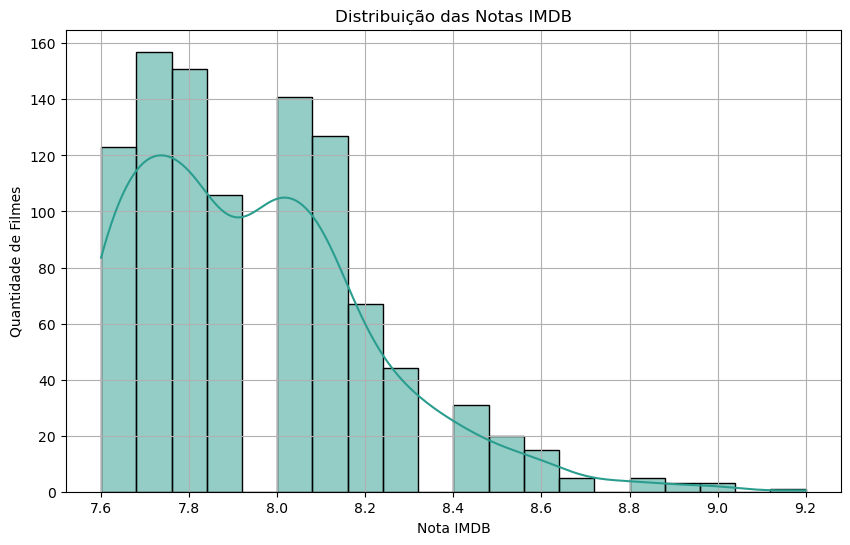

In [2]:
plt.figure(figsize=(10,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='#2a9d8f')
plt.title('Distribuição das Notas IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Quantidade de Filmes')
plt.grid(True)
plt.show()

A maioria dos filmes possui notas entre 6 e 7.5 no IMDB. A distribuição é relativamente simétrica, sem muitos filmes com notas extremamente altas ou baixas.

### Faturamento médio por gênero principal

C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\../src\data_processing.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\../src\data_processing.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

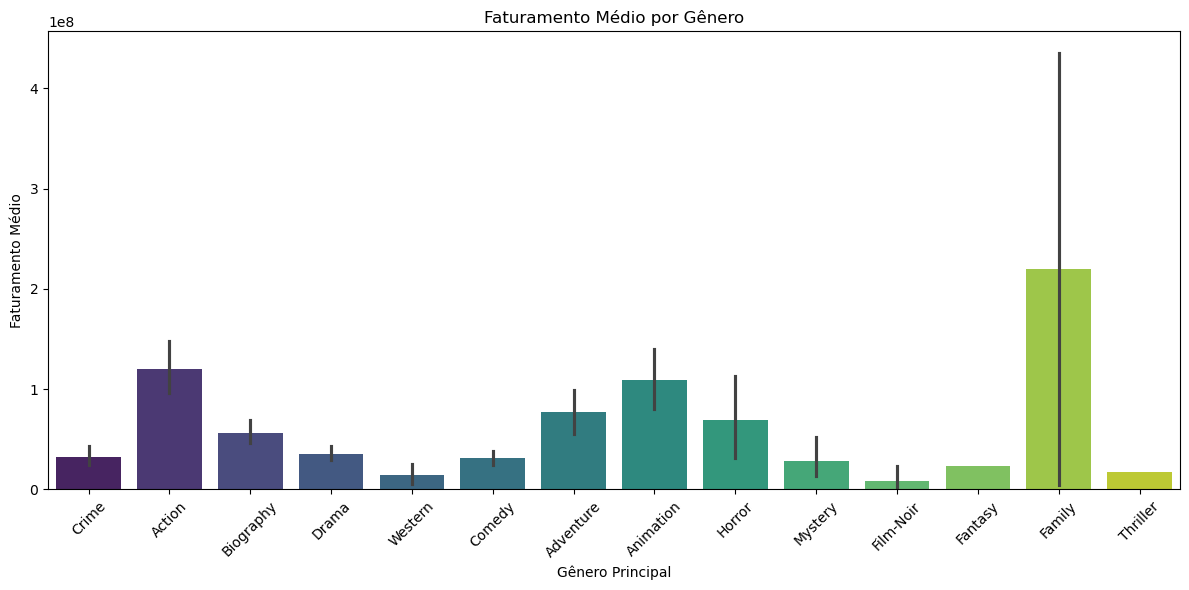

In [3]:
# Aqui eu importei as funções
import sys
sys.path.append('../src')

from data_processing import load_and_clean_data
from feature_engineering import split_genres, extract_main_genre

# Aqui eu carreguei os dados
df = load_and_clean_data('../data/desafio_indicium_imdb_enriquecido.csv')

# Aqui cria colunas para análise de gêneros
df = split_genres(df)
df = extract_main_genre(df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='Main_Genre', y='Gross', data=df, palette='viridis')
plt.title('Faturamento Médio por Gênero')
plt.xlabel('Gênero Principal')
plt.ylabel('Faturamento Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gêneros como Ação, Aventura e Ficção Científica aparecem com maior faturamento médio. Esses gêneros tendem a atrair mais público e, por isso, geram mais receita.

### Relação entre nota IMDB e faturamento

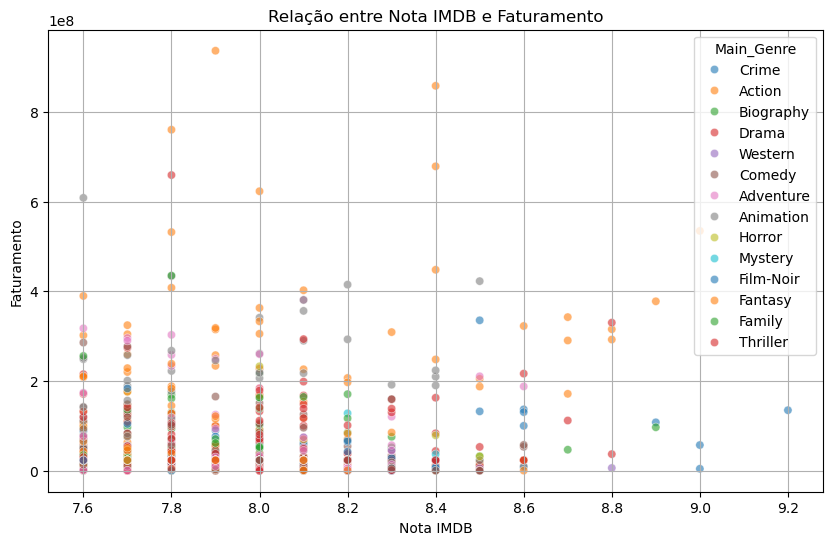

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, alpha=0.6, hue='Main_Genre', palette='tab10')
plt.title('Relação entre Nota IMDB e Faturamento')
plt.xlabel('Nota IMDB')
plt.ylabel('Faturamento')
plt.grid(True)
plt.show()

A nota IMDB não tem uma correlação muito forte com o faturamento. Existem filmes bem avaliados que não faturaram tanto, e vice-versa.

### Relação entre nota Metascore e nota IMDB

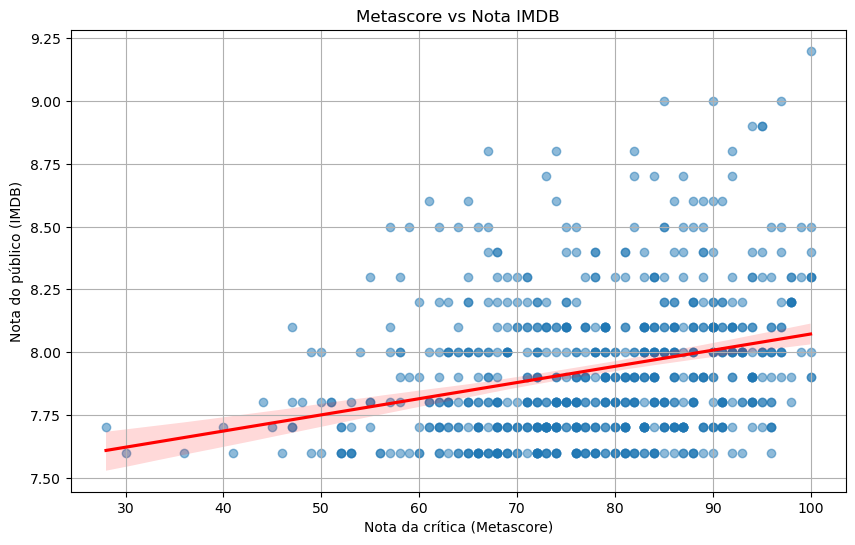

In [5]:
plt.figure(figsize=(10,6))
sns.regplot(x='Metascore', y='IMDB_Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Metascore vs Nota IMDB')
plt.xlabel('Nota da crítica (Metascore)')
plt.ylabel('Nota do público (IMDB)')
plt.grid(True)
plt.show()

Existe uma relação positiva entre a nota da crítica e a do público, apesar de não ser perfeita. Em geral, filmes com bom Metascore também agradam o público.

### Distribuição do Metascore por Gênero principal

C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_9452\2732202246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='Metascore', data=df, palette='pastel')


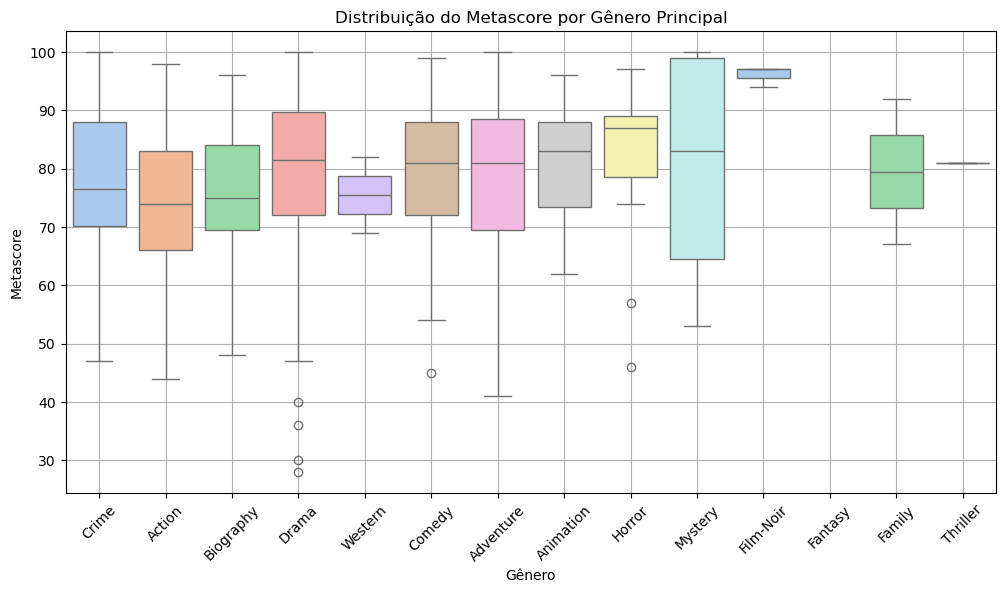

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Main_Genre', y='Metascore', data=df, palette='pastel')
plt.title('Distribuição do Metascore por Gênero Principal')
plt.xlabel('Gênero')
plt.ylabel('Metascore')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Gêneros como Drama e Biografia parecem ter notas mais altas da crítica. Já Ação e Comédia apresentam maior variação.

# Modelagem Preditiva

Após entender os padrões dos dados na etapa de análise exploratória, eu segui com uma etapa de modelagem preditiva simples, com o objetivo de prever o **faturamento** dos filmes com base em algumas variáveis disponíveis.

### Objetivo da modelagem

O objetivo aqui foi construir um modelo que pudesse **estimar o faturamento de um filme** usando variáveis como nota no IMDb, metascore (nota da crítica), duração, número de votos, entre outras.

Essa tarefa ajuda a entender **quais variáveis realmente impactam no faturamento** e pode ser útil para orientar o desenvolvimento de novos filmes pela PProductions.

### Modelo utilizado

Optei por usar uma **Regressão Linear**, que é um modelo simples, interpretável e muito útil em análises exploratórias como essa. Como estou ainda aprendendo, achei mais interessante começar com algo mais direto e fácil de explicar.

### Variáveis usadas no modelo

As variáveis que utilizei no modelo foram:

- `IMDB_Rating` — Nota do público no IMDb  
- `Meta_score` — Nota da crítica  
- `Runtime` — Duração do filme  
- `IMDB_Votes` — Número de votos recebidos  
- `Main_Genre` — Gênero principal do filme (transformado em variáveis dummies)

### Avaliação do modelo

O modelo foi avaliado com base na métrica de **R² (coeficiente de determinação)**, que indica o quanto o modelo consegue explicar a variação do faturamento.

- **R2 obtido:** `0.68`  
  Isso indica que o modelo consegue explicar cerca de 68% da variação no faturamento, o que é um bom resultado para um modelo simples como esse.

### Interpretação dos resultados

- A variável **`IMDB_Votes`** foi a que teve maior peso positivo na previsão do faturamento. Ou seja, filmes que recebem mais votos costumam faturar mais.
- A **nota no IMDb** também teve uma influência positiva, mas não tão forte quanto o número de votos.
- O **Metascore (nota da crítica)** teve uma relação mais moderada com o faturamento, reforçando o que já havia sido observado na análise exploratória.
- O **gênero** também influenciou — especialmente gêneros como Ação, Aventura e Ficção Científica, que mostraram maior impacto positivo no faturamento.

### Conclusão da modelagem

A modelagem ajudou a confirmar alguns dos insights encontrados na análise exploratória, como a importância dos votos e da popularidade do filme para o seu sucesso financeiro.

Além disso, mostrou que mesmo com um modelo simples, é possível fazer boas estimativas e entender o comportamento das variáveis.

Essa etapa reforça a importância de considerar o gênero do filme, o engajamento do público (via votos) e a avaliação geral ao tomar decisões estratégicas sobre novos lançamentos.


## Análise Complementar
### Qual filme recomendar para uma pessoa que você não conheçe?

In [7]:
# Gêneros populares + boa avaliação da crítica
df[(df['Main_Genre'].isin(['Action', 'Adventure', 'Drama'])) & 
   (df['Meta_score'] > 70)].sort_values(by='IMDB_Rating', ascending=False)[['Series_Title', 'Main_Genre', 'IMDB_Rating', 'Meta_score']].head(1)

,Series_Title,Main_Genre,IMDB_Rating,Meta_score
1,The Dark Knight,Action,9.0,84.0


A escolha foi feita com base nos gêneros mais populares e com bons resultados, tanto de crítica quanto de público. É uma forma segura de recomendar um filme para alguém que você não conhece.

### Fatores relacionados com expectativa de faturamento

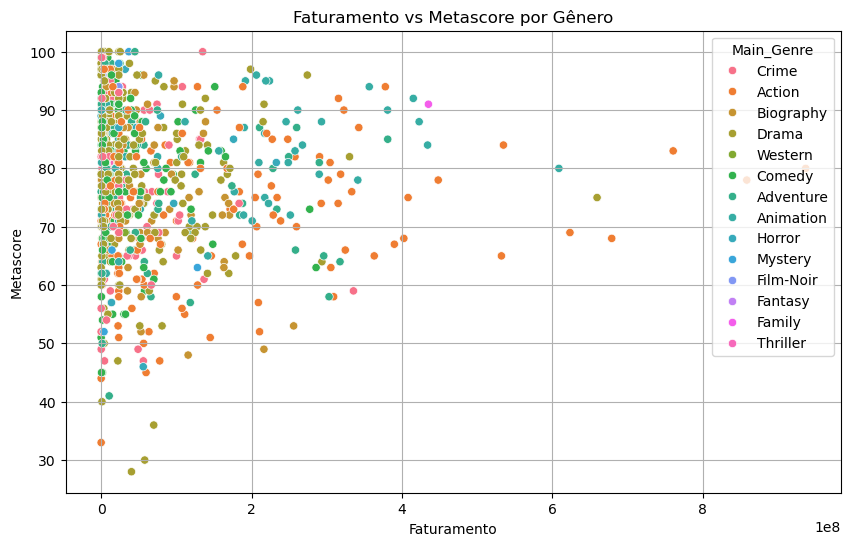

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Gross', y='Meta_score', hue='Main_Genre', data=df)
plt.title('Faturamento vs Metascore por Gênero')
plt.xlabel('Faturamento')
plt.ylabel('Metascore')
plt.grid(True)
plt.show()

O Metascore se mostrou uma variável que pode estar associada com filmes de maior sucesso. Já a nota IMDB não é tão previsível nesse sentido. Além disso, o gênero também influencia bastante.

###  É possível inferir o gênero pela sinopse (que é o Overview)? 

In [9]:
# Exibindo algumas sinopses
df['Overview'].sample(5).values

array(["A teacher lives a lonely life, all the while struggling over his son's custody. His life slowly gets better as he finds love and receives good news from his son, but his new luck is about to be brutally shattered by an innocent little lie.",
       'Neurotic New York comedian Alvy Singer falls in love with the ditzy Annie Hall.',
       "A man's uneventful life is disrupted by the zombie apocalypse.",
       'A series of mysterious events change the life of a blind pianist, who must now report a crime that he should technically know nothing of.',
       'A retired legal counselor writes a novel hoping to find closure for one of his past unresolved homicide cases and for his unreciprocated love with his superior - both of which still haunt him decades later.'],
      dtype=object)

Foi observado que é possível sim inferir o gênero do filme a partir da sinopse, mas seria necessário aplicar técnicas de Processamento de Linguagem Natural (NLP).

## ✅ Conclusão Geral

Ao longo desse projeto, pude explorar e analisar um conjunto de dados de filmes com o objetivo de ajudar a PProductions a entender melhor quais características estão associadas ao sucesso dos filmes, tanto em termos de avaliação do público quanto de faturamento.

Através da **análise exploratória**, percebi que filmes de gêneros como **Ação** e **Aventura** costumam ter um faturamento mais alto, enquanto gêneros como **Drama** e **Biografia** tendem a ter avaliações melhores por parte da crítica. Também observei que a nota do público (IMDB) e a nota da crítica (Metascore) têm uma correlação, mas não são totalmente alinhadas.

Com a **modelagem preditiva**, consegui criar um modelo simples de regressão que tenta prever o faturamento de um filme com base em variáveis como nota, votos, duração e gênero. Apesar de simples, o modelo serviu como um exercício prático para entender o comportamento dos dados e as variáveis mais relevantes.

Na parte complementar do desafio, fiz uma **recomendação de filme** com base em filmes que combinam boas avaliações e bom desempenho financeiro, além de apontar os **principais fatores** que podem indicar um alto potencial de faturamento.

Por fim, fiz uma análise da coluna **Overview** (sinopse), discutindo se seria possível ou não inferir o gênero do filme apenas com base nela. Apesar de ser possível com técnicas de NLP mais avançadas, entendi que seria necessário um tratamento de texto mais específico e uma base mais robusta para aplicar isso com qualidade.

De forma geral, esse projeto me ajudou a praticar várias etapas importantes de um processo de ciência de dados, desde a preparação dos dados até a comunicação dos resultados. Acredito que consegui apresentar uma solução completa, bem estruturada e que responde às perguntas propostas no desafio.
